In [52]:
from __future__ import annotations

import contextlib
from collections.abc import Iterable, Sequence
from typing import Any

import polars as pl
from anndata import AnnData
from lets_plot import (
    LetsPlot,
    aes,
    element_blank,
    element_rect,
    element_text,
    geom_point,
    ggplot,
    ggsize,
    ggtb,
    guide_legend,
    guides,
    layer_tooltips,
    scale_color_gradient,
    scale_fill_gradient,
    scale_size,
    scale_x_discrete,
    scale_y_discrete,
    theme,
    theme_classic,
)
from lets_plot.plot.core import PlotSpec

from cellestial import retrieve
from cellestial.frames import build_frame
from cellestial.themes import _THEME_DOTPLOT
from cellestial.util import _decide_tooltips, _range_inclusive

In [53]:
import anndata

data = anndata.read_h5ad("data/pbmc3k_pped.h5ad")

In [54]:
hvg = data.var_names[data.var["highly_variable"]].tolist()[:30]

In [55]:
frame = build_frame(data=data, axis=0, variable_keys=hvg)

In [56]:
frame

barcode,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,leiden,AL390719.2,C1QTNF12,AL162741.1,LINC01786,AL391244.2,TMEM52,AL589739.1,PLCH2,AL513320.1,CHD5,AL021155.5,VPS13D,AL031283.1,FAM131C,LINC01772,LINC01783,UBR4,AL031727.2,AL031005.2,NBPF3,WNT4,C1QA,C1QC,C1QB,LINC01355,ID3,AL031432.1,STMN1,CNKSR1,ZNF683
str,cat,i32,f64,f32,f32,f64,f64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,i64,cat,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
"""AAACCCAAGGATGGCT-1""","""s1d1""",2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237,2103,"""0""",-0.015695,-0.051608,-0.032246,-0.031868,-0.052656,-0.044452,-0.012353,-0.115476,-0.028972,-0.019927,-0.361637,-0.321426,-0.049415,-0.01088,-0.092983,-0.018487,-0.342262,-0.012204,-0.018085,-0.095215,-0.01564,-0.048821,-0.016735,-0.028011,-0.0919,-0.324834,-0.022962,-0.464612,-0.047801,-0.107066
"""AAACCCAAGGCCTAGA-1""","""s1d1""",3916,8.273081,12853.0,9.461411,35.843772,44.26204,52.376877,62.763557,1790.0,7.49053,13.92671,1719.0,7.450079,13.37431,58.0,4.077538,0.451257,3916,"""10""",-0.015695,-0.051608,-0.032246,-0.031868,-0.052656,-0.044452,-0.012353,-0.115476,-0.028972,-0.019927,-0.361637,-0.321426,-0.049415,-0.01088,-0.092983,-0.018487,-0.342262,-0.012204,-0.018085,-0.095215,-0.01564,-0.048821,-0.016735,-0.028011,-0.0919,-0.324834,-0.022962,-0.464612,-0.047801,-0.107066
"""AAACCCAAGTGAGTGC-1""","""s1d1""",683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.77989,581.0,6.36647,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057,683,"""15""",-0.015695,-0.051608,-0.032246,-0.031868,-0.052656,-0.044452,-0.012353,-0.115476,-0.028972,-0.019927,-0.361637,-0.321426,-0.049415,-0.01088,-0.092983,-0.018487,-0.342262,-0.012204,-0.018085,-0.095215,-0.01564,-0.048821,-0.016735,-0.028011,-0.0919,-0.324834,-0.022962,-0.464612,-0.047801,-0.107066
"""AAACCCACAAGAGGCT-1""","""s1d1""",4330,8.373554,17345.0,9.761117,27.66215,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675,4330,"""17""",-0.015695,-0.051608,-0.032246,-0.031868,-0.052656,-0.044452,-0.012353,-0.115476,-0.028972,-0.019927,1.705391,0.781341,-0.049415,-0.01088,-0.092983,-0.018487,-0.342262,-0.012204,-0.018085,-0.095215,-0.01564,-0.048821,-0.016735,-0.028011,-0.0919,-0.324834,-0.022962,2.409269,-0.047801,-0.107066
"""AAACCCACATCGTGGC-1""","""s1d1""",325,5.786897,555.0,6.320768,49.90991,59.459459,77.477477,100.0,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685,325,"""6""",-0.015695,-0.051608,-0.032246,-0.031868,-0.052656,-0.044452,-0.012353,-0.115476,-0.028972,-0.019927,-0.361637,-0.321426,-0.049415,-0.01088,-0.092983,-0.018487,-0.342262,-0.012204,-0.018085,-0.095215,-0.01564,-0.048821,-0.016735,-0.028011,-0.0919,-0.324834,-0.022962,-0.464612,-0.047801,-0.107066
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TTTGTTGAGAGTCTGG-1""","""s1d3""",277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.0,282.0,5.645447,45.853661,35.0,3.583519,5.691057,20.0,3.044523,3.252032,277,"""6""",-0.015695,-0.051608,-0.032246,-0.031868,-0.052656,-0.044452,-0.012353,-0.115476,-0.028972,-0.019927,-0.361637,-0.321426,-0.049415,-0.01088,-0.092983,-0.018487,6.460735,-0.012204,-0.018085,-0.095215,-0.01564,-0.048821,-0.016735,-0.028011,-0.0919,-0.324834,-0.022962,-0.464612,-0.047801,-0.107066
"""TTTGTTGCAGACAATA-1""","""s1d3""",3797,8.24223,13218.0,9.48941,30.753518,44.628537,53.691935,64.684521,864.0,6.76273,6.536541,3997.0,8.29355,30.239067,42.0,3.7612,0.31

In [57]:
index = [x for x in frame.columns if x not in hvg]

In [58]:
long_frame = frame.unpivot(on=hvg, index=index, variable_name="gene", value_name="expression")

In [59]:
long_frame

barcode,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_genes,leiden,gene,expression
str,cat,i32,f64,f32,f32,f64,f64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,i64,cat,str,f32
"""AAACCCAAGGATGGCT-1""","""s1d1""",2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237,2103,"""0""","""AL390719.2""",-0.015695
"""AAACCCAAGGCCTAGA-1""","""s1d1""",3916,8.273081,12853.0,9.461411,35.843772,44.26204,52.376877,62.763557,1790.0,7.49053,13.92671,1719.0,7.450079,13.37431,58.0,4.077538,0.451257,3916,"""10""","""AL390719.2""",-0.015695
"""AAACCCAAGTGAGTGC-1""","""s1d1""",683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.77989,581.0,6.36647,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057,683,"""15""","""AL390719.2""",-0.015695
"""AAACCCACAAGAGGCT-1""","""s1d1""",4330,8.373554,17345.0,9.761117,27.66215,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675,4330,"""17""","""AL390719.2""",-0.015695
"""AAACCCACATCGTGGC-1""","""s1d1""",325,5.786897,555.0,6.320768,49.90991,59.459459,77.477477,100.0,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685,325,"""6""","""AL390719.2""",-0.015695
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TTTGTTGAGAGTCTGG-1""","""s1d3""",277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.0,282.0,5.645447,45.853661,35.0,3.583519,5.691057,20.0,3.044523,3.252032,277,"""6""","""ZNF683""",-0.107066
"""TTTGTTGCAGACAATA-1""","""s1d3""",3797,8.24223,13218.0,9.48941,30.753518,44.628537,53.691935,64.684521,864.0,6.76273,6.536541,3997.0,8.29355,30.239067,42.0,3.7612,0.317749,3797,"""16""","""ZNF683""",-0.107066
"""TTTGTTGCATGTTACG-1""","""s1d3""",3089,8.035926,27280.0,10.213945,64.409824,71.671554,78.317449,85.054985,1025.0,6.933423,3.757332,3562.0,8.178358,13.057184,13145.0,9.483872,48.185482,3089,"""5""","""ZNF683""",-0.107066


In [60]:
stats_frame = long_frame.group_by(["leiden", "gene"]).agg(
    [
        pl.col("expression").mean().alias("avg_exp"),
        (pl.col("expression") > 1).mean().mul(100).alias("pct_exp"),
    ]
)

In [61]:
stats_frame

leiden,gene,avg_exp,pct_exp
cat,str,f32,f64
"""13""","""AL031432.1""",-0.022962,0.0
"""5""","""ID3""",-0.299909,0.740741
"""14""","""AL031727.2""",-0.012204,0.0
"""4""","""CHD5""",-0.019927,0.0
"""17""","""PLCH2""",-0.115476,0.0
…,…,…,…
"""1""","""AL031727.2""",-0.012204,0.0
"""4""","""AL021155.5""",0.152408,18.549747
"""6""","""AL021155.5""",0.601725,19.261477


In [62]:
from lets_plot import *

LetsPlot.setup_html()

In [63]:
(
    ggplot(stats_frame, aes(x="gene", y="leiden"))
    + geom_point(aes(size="pct_exp", color="avg_exp"))
    +
    # Styling to match the Scanpy aesthetic
    scale_color_gradient(low="lightgrey", high="blue")
    + scale_size(range=[2, 5])
    + theme_minimal2()
    + scale_y_discrete(expand=[0.05, 0.05])
    + scale_x_discrete(expand=[0.025, 0.025])
) + ggtb()

In [64]:
p = (
    (
        ggplot(stats_frame, aes(x="gene", y="leiden"))
        + geom_point(aes(size="pct_exp", color="avg_exp"))
        +
        # Styling to match the Scanpy aesthetic
        scale_color_gradient(low="lightgrey", high="blue")
        + scale_size(range=[1, 10])
        + theme_minimal2()
        + ggsize(800, 400)
    )
    + theme_classic()
    + theme(
        panel_border=element_rect(color="#1f1f1f", size=1.5),
        text=element_text(family="Arial", color="#1f1f1f"),
        axis_text_x=element_text(angle=90),
        axis_title=element_blank(),
        legend_text=element_text(size=10),
        legend_title=element_text(size=12),
        legend_box_spacing=0,
        legend_key_spacing_y=0,
    )
)

p

In [65]:
p

In [66]:
p + (
    scale_size(range=[1, 10])
    + scale_y_discrete(expand=[0.05, 0.05])
    + scale_x_discrete(expand=[0.05, 0.05])
)

In [ ]:
def dotplot(
    data: AnnData,
    keys: Sequence[str],
    group_by: str,
    *,
    threshold: float = 0,
    variable_name: str = "gene",
    value_name: str = "expression",
    color_low: str = "#e6e6e6",
    color_high: str = "#D2042D",
    fill: bool = False,
    sort_by: str | Sequence[str] | None = None,
    sort_order: str = "descending",
    percentage_key: str = "pct_exp",
    mean_key: str = "avg_exp",
    show_tooltips: bool = True,
    interactive: bool = False,
    **geom_kwargs,
) -> PlotSpec:
    """
    Dotplot.

    Parameters
    ----------
    data : AnnData
        The AnnData object of the single cell data.
    keys : Sequence[str]
        The variable keys or names to include in the dotplot.
    group_by : str
        The key to group the data by.
    threshold : float, default=0
        The expression threshold to consider a gene as expressed.
    variable_name : str, default='gene'
        The name of the variable column in the long format.
    value_name : str, default="expression"
        The name of the value column in the long format.
    color_low : str, default='#e6e6e6'
        The low color for the gradient.
    color_high : str, default='#D2042D'
        The high color for the gradient.
    fill : bool, optional
        Whether to use fill aesthetic instead of color, by default False.
    sort_by : str | None
        The column to sort the results by, by default None.
    sort_order : str, default='descending'
        The sort order, either 'ascending' or 'descending'.
    percentage_key : str, default='pct_exp'
        The name of the percentage column.
    mean_key : str, default='avg_exp'
        The name of the mean expression column
    show_tooltips : bool, default=True
        Whether to show tooltips.
    interactive : bool, default=False
        Whether to make the plot interactive.
    **geom_kwargs : Any
        Additional keyword arguments for the geom_point layer.

    Returns
    -------
    PlotSpec
        Dotplot.
    """
    # HANDLE: Data types
    if not isinstance(data, AnnData):
        msg = "data must be an `AnnData` object"
        raise TypeError(msg)
    # BUILD: dataframe
    frame = build_frame(data=data, axis=0, variable_keys=keys)
    index_columns = [x for x in frame.columns if x not in keys]

    #  CRITICAL PARTS: Dataframe Operations
    # 1. Unpivot frame
    long_frame = frame.unpivot(
        on=keys,
        index=index_columns,
        variable_name=variable_name,
        value_name=value_name,
    )
    # 2. Aggregate and compute stats
    stats_frame = long_frame.group_by([group_by, variable_name]).agg(
        [
            pl.col(value_name).mean().alias(mean_key),
            (pl.col(value_name) > threshold).mean().mul(100).alias(percentage_key),
        ]
    )

    # HANDLE: Sorting
    # In case of pseudo-categorical integer group_by
    with contextlib.suppress(Exception):  # supress errors if sorting fails
        stats_frame = (
            stats_frame.with_columns(pl.col(group_by).cast(pl.String).cast(pl.Int64))
            .sort(group_by, descending=True)
            .with_columns(pl.col(group_by).cast(pl.String).cast(pl.Categorical))
        )
        # remove group_by from sort_by if present
        if isinstance(sort_by, str):
            sort_by = [sort_by]
        if sort_by is not None:
            sort_by = [s for s in sort_by if s != group_by]
    # perform sorting
    if sort_by is not None:
        stats_frame = stats_frame.sort(
            by=sort_by,
            descending=(sort_order == "descending"),
        )

    # BUILD: Dotplot
    if not fill:  # use color aesthetic
        dtplt = (
            ggplot(stats_frame, aes(x=variable_name, y=group_by))
            + geom_point(aes(size=percentage_key, color=mean_key), **geom_kwargs)
            + scale_color_gradient(low=color_low, high=color_high)
        )
    else:  # elif fill: use fill aesthetic
        dtplt = (
            ggplot(stats_frame, aes(x=variable_name, y=group_by))
            + geom_point(aes(size=percentage_key, fill=mean_key), **geom_kwargs)
            + scale_fill_gradient(low=color_low, high=color_high)
        )

    # ADD: layers
    dtplt += _THEME_DOTPLOT

    # HANDLE: interactive
    if interactive:
        dtplt += ggtb(size_zoomin=-1)

    return dtplt

In [ ]:

dp = dotplot(
    data=data,
    keys=hvg,
    group_by="leiden",
    threshold=1,
    color_low="snow",
    color_high="red",
    interactive=False,
    sort_order="ascending",
    sort_by=["pct_exp", "avg_exp"],
    shape=21,
    fill=True,
    stroke=0.2,
    tooltips=layer_tooltips(["gene", "leiden", "pct_exp", "avg_exp"]),
)
dp

In [152]:
dp

In [153]:
dp + theme_minimal2()

In [154]:
dp + scale_size_area(max_size=7)

In [71]:
import scanpy as sc

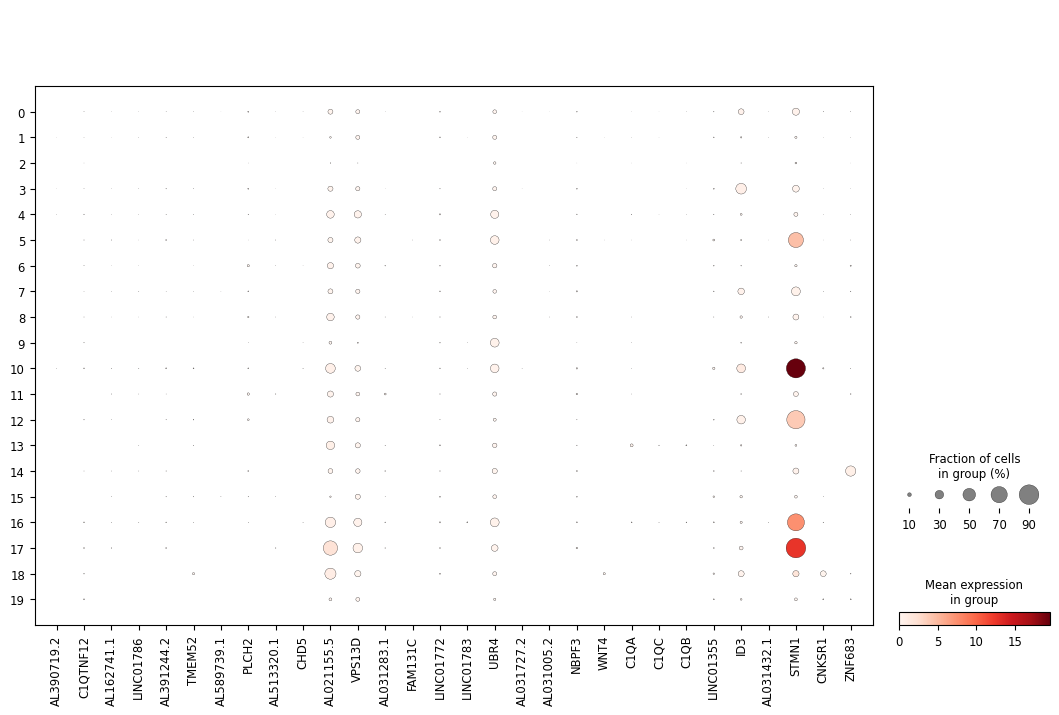

In [77]:
sc.pl.dotplot(
    data,
    var_names=hvg,
    groupby="leiden",
)